# Delta network

In [1]:
import AlloViz

## what

### System setup

We are going to use the structure and simulations of the class A GPCR Beta-2 adrenergic receptor (B2AR) in its active state. They are stored in the [GPCRmd](https://submission.gpcrmd.org/view/117/) database, and supplying the [Protein](api/AlloViz.Protein.rst) class constructor with the GPCRmd ID as the `GPCR` parameter is enough, as the program automatically downloads the files. Alternatively, we could have specified the structure and trajectory files and other parameters of the constructor.

The [Protein](api/AlloViz.Protein.rst) class constructor also processes the input data to prepare it for the downstream calculations, analyses and visualization.

In [2]:
activeB2AR = AlloViz.Protein(GPCR=117, name="Active B2AR")

downloading 117/11156_trj_117.xtc
downloading 117/11157_trj_117.xtc
downloading 117/11158_trj_117.xtc
downloading 117/11159_dyn_117.pdb
downloading 117/11160_dyn_117.psf
downloading 117/11161_prm_117.tar.gz


/gpcr/users/frann/networks/dev_expl_nover/lib/python3.9/site-packages/MDAnalysis/coordinates/PDB.py:749: UserWarning: Unit cell dimensions not found. CRYST1 record set to unitary values.
  warnings.warn("Unit cell dimensions not found. "
/gpcr/users/frann/networks/dev_expl_nover/lib/python3.9/site-packages/MDAnalysis/lib/util.py:662: RuntimeWarning: Constructed NamedStream from a NamedStream
  warnings.warn("Constructed NamedStream from a NamedStream",
/gpcr/users/frann/networks/dev_expl_nover/lib/python3.9/site-packages/MDAnalysis/coordinates/PDB.py:431: UserWarning: 1 A^3 CRYST1 record, this is usually a placeholder. Unit cell dimensions will be set to None.
  warnings.warn("1 A^3 CRYST1 record,"


### Network calculation

AlloViz brings together 8 different Python packages, previously peer-reviewed and published, which allow the construction of allosteric communication networks using different descriptors (plus a network construction method we implemented ourselves). All the available options can be found in [this table](table.rst) (the last column has the names to be used in the [calculate](api/AlloViz.Protein.calculate.rst) method of the Protein object).

We are going to use pytraj as network construction method, which measures the correlation of the residues' alpha-carbons positions along the trajectory using the Pearson's correlation coefficient. Multiple networks can be calculated at the same time supplying a list of strings, e.g. `["pytraj_CA", "pytraj_CB"]`

In [3]:
activeB2AR.calculate(pkgs="pytraj_CA")

adding raw data of pytraj_CA for 117/data/protein.pdb:  ['117/data/pytraj_CA/raw/1.pq', '117/data/pytraj_CA/raw/2.pq', '117/data/pytraj_CA/raw/3.pq']


The calculated raw data is both saved as a file for reconstitution later and added as an attribute of the Protein object:

In [4]:
activeB2AR.pytraj_CA.raw

1         2         3    weight  weight_std
GLN:26  GLU:27   0.924889  0.894519  0.915184  0.911531    0.015511
        ARG:28   0.816165  0.641323  0.839703  0.765730    0.108381
        ASP:29   0.729000  0.560310  0.476702  0.588670    0.128518
        GLU:30   0.779299  0.553206  0.469027  0.600511    0.160454
        VAL:31   0.828841  0.598500  0.471320  0.632887    0.181224
...                   ...       ...       ...       ...         ...
LEU:339 CYS:341  0.897811  0.887321  0.881075  0.888736    0.008457
        LEU:342  0.753879  0.770066  0.749877  0.757941    0.010690
LEU:340 CYS:341  0.938434  0.925723  0.922498  0.928885    0.008425
        LEU:342  0.849064  0.849135  0.830982  0.843060    0.010460
CYS:341 LEU:342  0.903325  0.923775  0.904496  0.910532    0.011484

[45753 rows x 5 columns]

### Network filtering

AlloViz allows to filter the calculated networks according to different criteria (the different options are each of the functions defined in the [Filtering](api/AlloViz.AlloViz.Filtering.rst) module).

We are going to filter the pytraj_CA network using the [Spatially_distant](api/AlloViz.AlloViz.Filtering.Spatially_distant.rst), which filters out residue pairs of the network with a CA-CA distance below a threshold (default: 10 angstroms) to focus on long-range residue pairs. Multiple filterings can be performed supplying a list of strings to the [filter](api/AlloViz.Protein.filter.rst) method, and this list can also contain an additional list if we wish to filter with a combination of two criteria sequentially, e.g. `["Spatially_distant", ["GPCR_Interhelix", "Spatially_distant"]]`

In [5]:
activeB2AR.filter(filterings="Spatially_distant")
# the same as: activeB2AR.pyraj_CA.filter(filterings="Spatially_distant")

The results are stored as a new attribute of the `pytraj_CA` results, with the filtered network stored as NetworkX's Graph objects for later analysis:

In [6]:
activeB2AR.pytraj_CA.Spatially_distant.graphs

{'1': <networkx.classes.graph.Graph at 0x7ff793059f10>,
 '2': <networkx.classes.graph.Graph at 0x7ff7930593d0>,
 '3': <networkx.classes.graph.Graph at 0x7ff793059160>,
 'weight': <networkx.classes.graph.Graph at 0x7ff793059d60>}

### Network analysis

AlloViz can analyze the filtered networks with the betweenness centrality and current-flow betweenness centrality metrics (for edges and/or for nodes) functions of NetworkX. Other NetworkX functions that return per-edge or per-residue values can be passed to the [analyze](api/AlloViz.Protein.analyze.rst) method.

For example, we can analyze the betweenness centrality ("btw") of both the edges and the nodes of the filtered network. As before, we can run multiple analysis at the same time by supplying lists.

In [7]:
activeB2AR.analyze(elements=["edges", "nodes"], metrics="btw")
# the same as: activeB2AR.pyraj_CA.Spatially_distant.analyze(elements=["edges", "nodes"], metrics="btw")

adding analyzed edges <AlloViz.Wrappers.pytraj_w.pytraj_CA object at 0x7ff7931b8850> Spatially_distant data of for 117/data/protein.pdb
adding analyzed nodes <AlloViz.Wrappers.pytraj_w.pytraj_CA object at 0x7ff7931b8850> Spatially_distant data of for 117/data/protein.pdb


The results are stored as DataFrames as new attributes of the `Spatially_distant` filtering results, one for each element of the network.

In [8]:
activeB2AR.pytraj_CA.Spatially_distant.nodes

,btw_weight,btw,btw_std
GLN:26,0.012079,0.006542,0.011065
VAL:31,0.000000,0.016751,0.021030
TRP:32,0.070912,0.000887,0.001297
VAL:33,0.000000,0.001694,0.002456
VAL:34,0.000154,0.002281,0.003875
...,...,...,...
LEU:342,0.002420,0.015981,0.010658
GLU:27,0.000022,0.008588,0.009183
ARG:28,0.004554,0.013656,0.021462
ASP:29,0.003542,0.017022,0.014820


### Network visualization

The analysis results of the edges or the nodes (and also both together) can be visualised on the protein structure with an interactive widget. The exact element that we wish to visualise can be specified to the [view](api/AlloViz.Protein.view.rst) method, or we can exploit the custom edges' and nodes' [DataFrames' view](api/AlloViz.AlloViz.Elements.Element.view.rst) method.

For example, to view the edges' betweenness centrality analysis results:

/gpcr/users/frann/networks/dev_expl_nover/lib/python3.9/site-packages/MDAnalysis/coordinates/PDB.py:431: UserWarning: 1 A^3 CRYST1 record, this is usually a placeholder. Unit cell dimensions will be set to None.
  warnings.warn("1 A^3 CRYST1 record,"


NGLWidget()

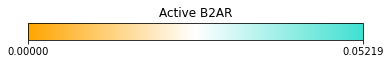

In [11]:
activeB2AR.pytraj_CA.Spatially_distant.edges.view("btw")
# the same as: activeB2AR.view(pkg="pytraj_CA", metric="btw", filtering="Spatially_distant", element="edges")

## Delta-network

A delta-network of two `Protein`s allows to highlight the differences between the networks of the two structures. In this case, we could compare our active B2AR to the inactive state, which corresponds to the GPCRmd entry ID 160.

In [12]:
inactiveB2AR = AlloViz.Protein(GPCR=160, name="Inactive B2AR")
inactiveB2AR.calculate("pytraj_CA")
inactiveB2AR.filter(filterings="Spatially_distant")
inactiveB2AR.analyze(elements="edges", metrics="btw")

downloading 160/11498_trj_160.xtc
downloading 160/11499_trj_160.xtc
downloading 160/11500_trj_160.xtc
downloading 160/11502_dyn_160.psf
downloading 160/11503_dyn_160.pdb
downloading 160/11504_prm_160.tar.gz


/gpcr/users/frann/networks/dev_expl_nover/lib/python3.9/site-packages/MDAnalysis/coordinates/PDB.py:749: UserWarning: Unit cell dimensions not found. CRYST1 record set to unitary values.
  warnings.warn("Unit cell dimensions not found. "
/gpcr/users/frann/networks/dev_expl_nover/lib/python3.9/site-packages/MDAnalysis/lib/util.py:662: RuntimeWarning: Constructed NamedStream from a NamedStream
  warnings.warn("Constructed NamedStream from a NamedStream",
/gpcr/users/frann/networks/dev_expl_nover/lib/python3.9/site-packages/MDAnalysis/coordinates/PDB.py:431: UserWarning: 1 A^3 CRYST1 record, this is usually a placeholder. Unit cell dimensions will be set to None.
  warnings.warn("1 A^3 CRYST1 record,"


adding raw data of pytraj_CA for 160/data/protein.pdb:  ['160/data/pytraj_CA/raw/1.pq', '160/data/pytraj_CA/raw/2.pq', '160/data/pytraj_CA/raw/3.pq']
adding analyzed edges <AlloViz.Wrappers.pytraj_w.pytraj_CA object at 0x7ff7a00c2850> Spatially_distant data of for 160/data/protein.pdb


The [Delta](api/AlloViz.Delta.rst) constructor performs the delta-network calculations automatically when supplied with two `Protein` objects, and also includes a [view](api/AlloViz.Delta.view.rst) method for visualisation of the results.

In [13]:
delta = AlloViz.Delta(activeB2AR, inactiveB2AR)

/gpcr/users/frann/networks/dev_expl_nover/lib/python3.9/site-packages/MDAnalysis/coordinates/PDB.py:431: UserWarning: 1 A^3 CRYST1 record, this is usually a placeholder. Unit cell dimensions will be set to None.
  warnings.warn("1 A^3 CRYST1 record,"


NGLWidget()

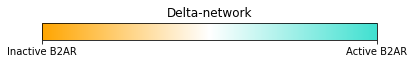

In [14]:
delta.view(pkg="pytraj_CA", metric="btw", filtering="Spatially_distant", element=["edges"])
# the same as: delta.pytraj_CA.Spatially_distant.edges.view("btw")